# Build a Recurrent Neural Network to predict the stock price of Google using LSTM

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv', sep=',') 

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))

In [7]:
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Training Set

In [46]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [47]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [49]:
y_train.shape

(1198,)

### Reshaping

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN 

In [25]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

### Initialize the RNN

In [28]:
regressor = Sequential()

In [31]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [32]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [33]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 

In [34]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2)) 

In [35]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

### Fitting the RNN

In [51]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0448
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013


## Evaluating the Network

### Test Set

In [54]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv', sep=',') 

In [55]:
real_stock_price = dataset_test.iloc[:, 1:2].values

### Prediction

In [56]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [58]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60: ].values

In [59]:
inputs = inputs.reshape(-1,1)

In [60]:
inputs = sc.transform(inputs)

In [61]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [62]:
X_test = np.array(X_test)

In [63]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [64]:
predicted_stock_price = regressor.predict(X_test)

In [65]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the Output

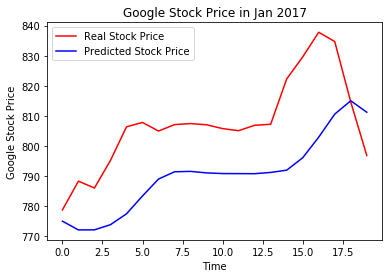

In [66]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title("Google Stock Price in Jan 2017")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Root Mean Squared Error

In [67]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [68]:
rmse

20.423949419379753

## Ways to improve the RNN model:

• Getting more training data: here the model is trained on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.

•Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).

•Adding some other indicators: if we have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.

•Adding more LSTM layers: here, the RNN was built with four LSTM layers but we could try with even more.

•Adding more neurones in the LSTM layers: the requirement of a high number of neurons in the LSTM layers to respond better to the complexity of the problem and here I chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.